In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Goals-
- Dateset Preparation
- Implementing Linear Regression(gradient descent)
- Prediction

In [125]:
X = pd.read_csv('Dataset/X_train.csv').values
Y = pd.read_csv('Dataset/Y_train.csv').values

X = (X - X.mean()) / X.std()
X.shape, Y.shape

((98, 1), (98, 1))

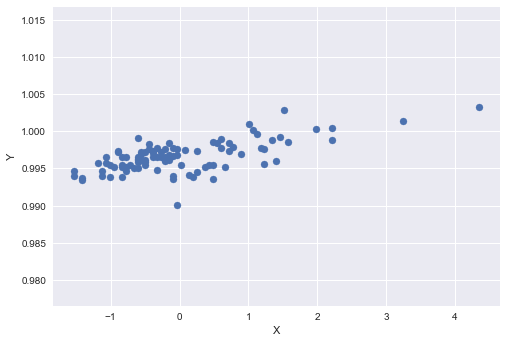

In [126]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Algorithm
- hypothesis = theta[1]*x + theta[0]
- cost function = (hypothesis(x) - y)**2
- theta - = lr * gradient

In [127]:
def hypothesis(x,theta):
    hx = theta[1]*x + theta[0]
    return hx

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        hx = hypothesis(x,theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])*x
    return grad/m

def error(X,Y,theta):
    err = 0
    for i in range(X.shape[0]):
        err += (hypothesis(X[i],theta) - Y[i])**2
    return err

def gradient_descent(X,Y,learning_rate = 0.09,epochs = 100):
        m = X.shape[0]
        theta = np.array([-3.0,0.0])
        error_list = []
        theta_list = []
        for i in range(epochs):
            grad = gradient(X,Y,theta)
            error_list.append(error(X,Y,theta))
            theta_list.append(theta)
            theta[0] = theta[0] - learning_rate*grad[0]
            theta[1] = theta[1] - learning_rate*grad[1]
        return theta,error_list,theta_list

In [128]:
theta,error_list,theta_list = gradient_descent(X,Y)

[0.99631297 0.00136635]


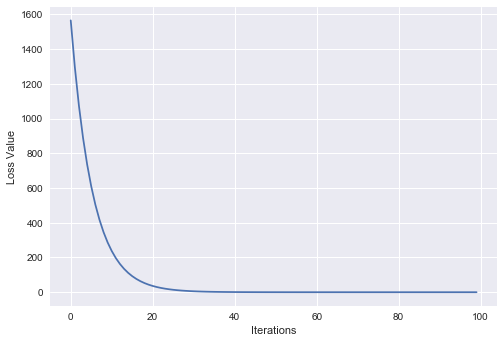

In [129]:
print(theta)
plt.plot(error_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.show()

In [130]:
X_test = np.linspace(-2,3,10)
Y_pred = theta[0] + theta[1]*X_test
print(X_test.shape)
print(Y_pred.shape)

(10,)
(10,)


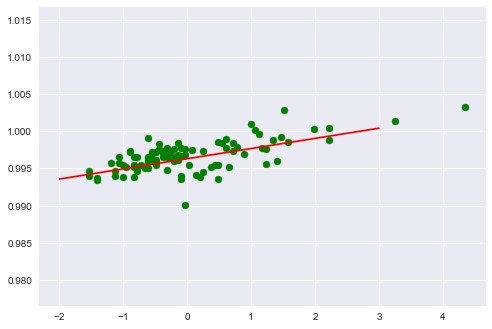

In [131]:
plt.scatter(X,Y,c='g')
plt.plot(X_test,Y_pred,c='r')
plt.show()

### Using SK-Learn

In [132]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [133]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
Y_sk = lr.predict(X_test.reshape((-1,1)))

In [135]:
Y_sk

array([[0.99390054],
       [0.99465969],
       [0.99541884],
       [0.99617798],
       [0.99693713],
       [0.99769627],
       [0.99845542],
       [0.99921457],
       [0.99997371],
       [1.00073286]])

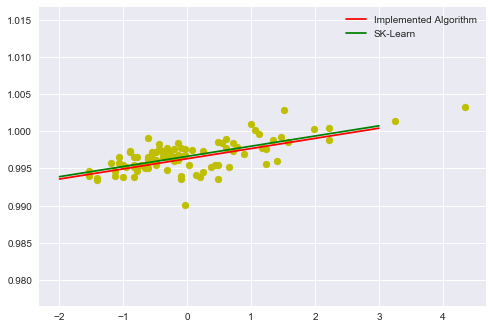

In [136]:
plt.scatter(X,Y,c='y')
plt.plot(X_test,Y_pred,c='r',label='Implemented Algorithm')
plt.plot(X_test,Y_sk,c='g',label='SK-Learn')
plt.legend()
plt.show()

- got the almost same paraters

### Visualization Curve- 
- shows how the values of theta is reaching global minimum

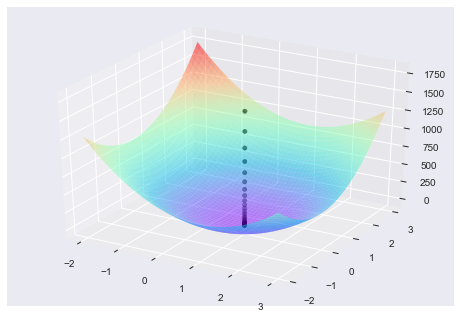

In [141]:
# 3D Loss Plot
from mpl_toolkits.mplot3d import Axes3D
#ax = fig.add_subplot(111,project='3d')
t0 = np.arange(-2,3,0.01)
t1 = np.arange(-2,3,0.01)
t0,t1 = np.meshgrid(t0,t1)
J = np.zeros(t0.shape)
m = t0.shape[0]
n = t0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - t1[i,j]*X - t0[i,j])**2)

fig = plt.figure()
axes = fig.gca(projection='3d')

theta_list = np.array(theta_list)
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')

axes.plot_surface(t0,t1,J,cmap='rainbow',alpha=.5)
plt.show()

In [142]:
theta_list
np.save("theta_list.npy",theta_list)
np.save("error_list.npy",error_list)
